In [2]:
from collections import Counter
import matplotlib.pyplot as plt
import random
import math
import numpy as np

In [3]:
def predict(alpha, beta, x_i):
  return beta * x_i + alpha

In [4]:
def mean(x):
  return sum(x) / len(x)
def de_mean(x):
  x_bar = mean(x)
  return [x_i - x_bar for x_i in x]
def dot(v, w):
  return sum(v_i * w_i
        for v_i, w_i in zip(v, w))
def sum_of_squares(x):
  return sum([x_i * x_i for x_i in x])
def variance(x):
  n = len(x)
  deviations = de_mean(x)
  return sum_of_squares(deviations) / (n - 1)
def standard_deviation(x):
  return math.sqrt(variance(x))
def covariance(x, y):
  n = len(x)
  return dot(de_mean(x), de_mean(y)) / (n - 1)
def correlation(x, y):
  stdev_x = standard_deviation(x)
  stdev_y = standard_deviation(y)
  if stdev_x > 0 and stdev_y > 0:
    return covariance(x, y) / stdev_x / stdev_y
  else:
    return

In [12]:
def error(alpha, beta, x_i, y_i):
  """the error from predicting beta * x_i + alpha when the actual value is y_i"""
  return y_i - predict(alpha, beta, x_i)

def sum_of_squared_errors(alpha, beta, x, y):
  return sum(error(alpha, beta, x_i, y_i) ** 2
        for x_i, y_i in zip(x, y))
  
def least_squares_fit(x, y):
  """given training values for x and y, find the least-squares values of alpha and beta"""
  beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
  alpha = mean(y) - beta * mean(x)
  return alpha, beta

# **ATIVIDADE 1**

Alfa = 2.756608505940138 
Beta = 0.08211835670620697
R2 =  0.9639125885476649


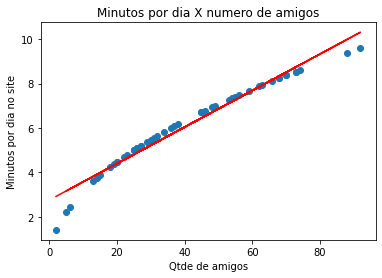

In [27]:
from random import randint
num_friends = [randint(0, 99) for _ in range(0,50)]
daily_min = [math.sqrt(f) for f in num_friends]

alpha, beta = least_squares_fit(num_friends, daily_min)
print("Alfa =", alpha, "\nBeta =", beta)

print("R2 = ", r_squared(alpha,beta, num_friends, daily_min))

pred_daily_min = [predict(alpha, beta, i) for i in num_friends]
plt.scatter(num_friends, daily_min)
plt.plot(num_friends, pred_daily_min, color='red', linestyle='solid')
plt.title("Minutos por dia X numero de amigos")
plt.xlabel("Qtde de amigos")
plt.ylabel("Minutos por dia no site")
plt.show()

# **Atividade 2**

In [55]:
data = np.genfromtxt('oxigenio.txt', missing_values=0, delimiter=' ', skip_header=1)


In [56]:
data

array([[11.37 , 44.609],
       [10.07 , 45.313],
       [ 8.65 , 54.297],
       [ 8.17 , 59.571],
       [ 9.22 , 49.874],
       [11.63 , 44.811],
       [11.95 , 45.681],
       [10.85 , 49.091],
       [13.08 , 39.442],
       [ 8.63 , 60.055],
       [10.13 , 50.541],
       [14.03 , 37.388],
       [11.12 , 44.754],
       [10.6  , 47.273],
       [10.33 , 51.855],
       [ 8.95 , 49.156],
       [10.95 , 40.836],
       [10.   , 46.672],
       [10.25 , 46.774],
       [10.08 , 50.388],
       [12.63 , 39.407],
       [11.17 , 46.08 ],
       [ 9.63 , 45.441],
       [ 8.92 , 54.625],
       [11.08 , 45.118],
       [12.88 , 39.203],
       [10.47 , 45.79 ],
       [ 9.93 , 50.545],
       [ 9.4  , 48.673],
       [11.5  , 47.92 ],
       [10.5  , 47.467]])

Alfa = 82.4217726798675 
Beta = -3.310555361781675
R2 =  0.7433801022440326


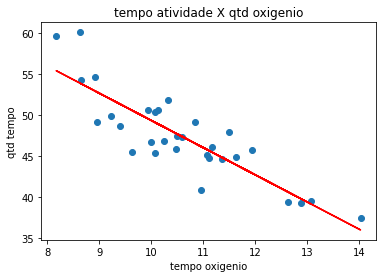

Predicao de oxigenio para 15min. =  32.76344225314237
Predicao de oxigenio para 15min. =  26.142331529579025
Predicao de oxigenio para 15min. =  19.52122080601567


In [59]:
alpha, beta = least_squares_fit(data[:,0], data[:,1])
print("Alfa =", alpha, "\nBeta =", beta)

print("R2 = ", r_squared(alpha,beta, data[:,0], data[:,1]))

pred_oxigenio = [predict(alpha, beta, i) for i in data[:,0]]
plt.scatter( data[:,0],  data[:,1])
plt.plot( data[:,0], pred_oxigenio, color='red', linestyle='solid')
plt.title("tempo atividade X qtd oxigenio")
plt.xlabel("tempo oxigenio")
plt.ylabel("qtd tempo")
plt.show()


print("Predicao de oxigenio para 15min. = ", predict(alpha,beta, 15));
print("Predicao de oxigenio para 15min. = ", predict(alpha,beta, 17));
print("Predicao de oxigenio para 15min. = ", predict(alpha,beta, 19));